# Lecture 1 Statistical Distributions
## Part 2: moments

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

start_date = datetime(2023,10,1)
end_date = datetime(2024,1,15)

In [3]:
# Preliminary Analysis 1
stock_1 = yf.download('NVDA',start_date ,end_date)

# Discussion 1
x = stock_1['Adj Close'].values
print('SAMPLE MEAN',np.mean(x))
print('SAMPLE STD',np.std(x))
print('SAMPLE SKEWNESS: ',ss.skew(x, axis=0, bias=True))
print('SAMPLE KURTOSIS: ',ss.kurtosis(x, axis=0, bias=True)+3)
print(stock_1.head())

# Disucssion 2
print(stock_1['Adj Close'].describe()) # summary statistics

[*********************100%%**********************]  1 of 1 completed

SAMPLE MEAN 46.958824740515816
SAMPLE STD 3.217214594674885
SAMPLE SKEWNESS:  0.04311693456131068
SAMPLE KURTOSIS:  3.0865995055389104
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-10-02  44.029999  45.174999  43.861000  44.782001  44.772285  433298000
2023-10-03  44.807999  45.130001  43.245998  43.516998  43.507557  470850000
2023-10-04  43.742001  44.143002  43.292000  44.041000  44.031445  361821000
2023-10-05  44.049999  44.900002  43.888000  44.688000  44.678303  393483000
2023-10-06  44.193001  45.789001  44.026001  45.762001  45.752071  434436000
count    72.000000
mean     46.958825
std       3.239792
min      40.317253
25%      45.196192
50%      47.219843
75%      48.908688
max      54.814926
Name: Adj Close, dtype: float64


In [4]:
# =============================================================================
# Preliminary Analysis 2
# =============================================================================
stock_2 = yf.download('TSLA',start_date ,end_date)

# Discussion 3
y = stock_2['Adj Close'].values
print('SAMPLE MEAN',np.mean(y))
print('SAMPLE STD',np.std(y))
print('SAMPLE SKEWNESS: ',ss.skew(y, axis=0, bias=True))
print('SAMPLE KURTOSIS: ',ss.kurtosis(y, axis=0, bias=True)+3)
print(stock_1.head())

# Disucssion 4
print(stock_2['Adj Close'].describe()) # summary statistics

[*********************100%%**********************]  1 of 1 completed

SAMPLE MEAN 237.36291609870062
SAMPLE STD 16.792581412761812
SAMPLE SKEWNESS:  -0.4870844221242995
SAMPLE KURTOSIS:  2.376110137030139
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2023-10-02  44.029999  45.174999  43.861000  44.782001  44.772285  433298000
2023-10-03  44.807999  45.130001  43.245998  43.516998  43.507557  470850000
2023-10-04  43.742001  44.143002  43.292000  44.041000  44.031445  361821000
2023-10-05  44.049999  44.900002  43.888000  44.688000  44.678303  393483000
2023-10-06  44.193001  45.789001  44.026001  45.762001  45.752071  434436000
count     72.000000
mean     237.362916
std       16.910426
min      197.360001
25%      223.327503
50%      239.059998
75%      251.239998
max      263.619995
Name: Adj Close, dtype: float64


**Explanation: **
- Calculations are corrected for statistical bias, if bias set to False.
- Python reports excess kurtosis, by substracting 3 (kurtosis of normal distribution) from the calculated value. 
- A distribution with a negative kurtosis value indicates that the distribution has sharper heads and lighter (thinner) tails than the normal distribution. 
- A distribution with a positive kurtosis, is said to be leptokurtic, which means that it has flatter heads and heavier tails compared to a normal distribution.

### Mean

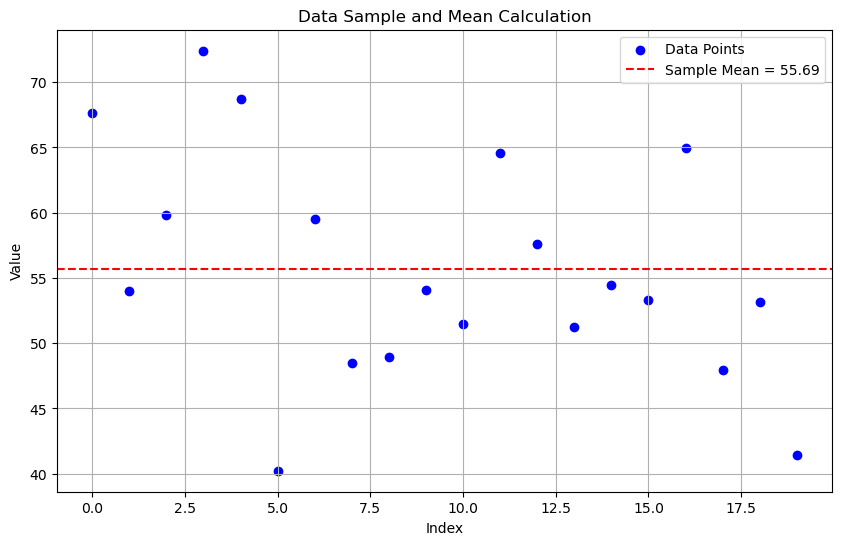

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the data sample
np.random.seed(0)  # For reproducibility
sample_size = 20  # Number of data points
mean_value = 50    # True mean of the data
std_dev = 10       # Standard deviation of the data

# Generate a random sample from a normal distribution
data_sample = np.random.normal(loc=mean_value, scale=std_dev, size=sample_size)

# Calculate the mean of the data sample
sample_mean = np.mean(data_sample)

# Plot the data sample and the mean
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(np.arange(sample_size), data_sample, color='blue', label='Data Points')

# Plot mean line
plt.axhline(y=sample_mean, color='red', linestyle='--', label=f'Sample Mean = {sample_mean:.2f}')

# Add labels and title
plt.title('Data Sample and Mean Calculation')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Skewness

To demonstrate distributions with positive skewness, negative skewness, and zero skewness, we can use common distributions that exhibit these properties:

- Positive Skewness: Exponential Distribution
- Negative Skewness: Beta Distribution (with parameters favoring skewness towards 0)
- Zero Skewness: Normal Distribution

In [6]:
import numpy as np
from scipy.stats import skew

# Example data
data = np.array([1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000])

# Calculate skewness using scipy
data_skewness_scipy = skew(data, bias=False)  # bias=False for sample skewness

print(f"Skewness (using scipy): {data_skewness_scipy:.4f}")

# Manual calculation
mean = np.mean(data)
std_dev = np.std(data, ddof=0)  # Population standard deviation; use ddof=1 for sample
third_moment = np.mean((data - mean) ** 3)
n = len(data)
manual_skewness = (third_moment / (std_dev ** 3))

print(f"Manual skewness calculation: {manual_skewness:.4f}")

Skewness (using scipy): 3.4635
Manual skewness calculation: 3.0146


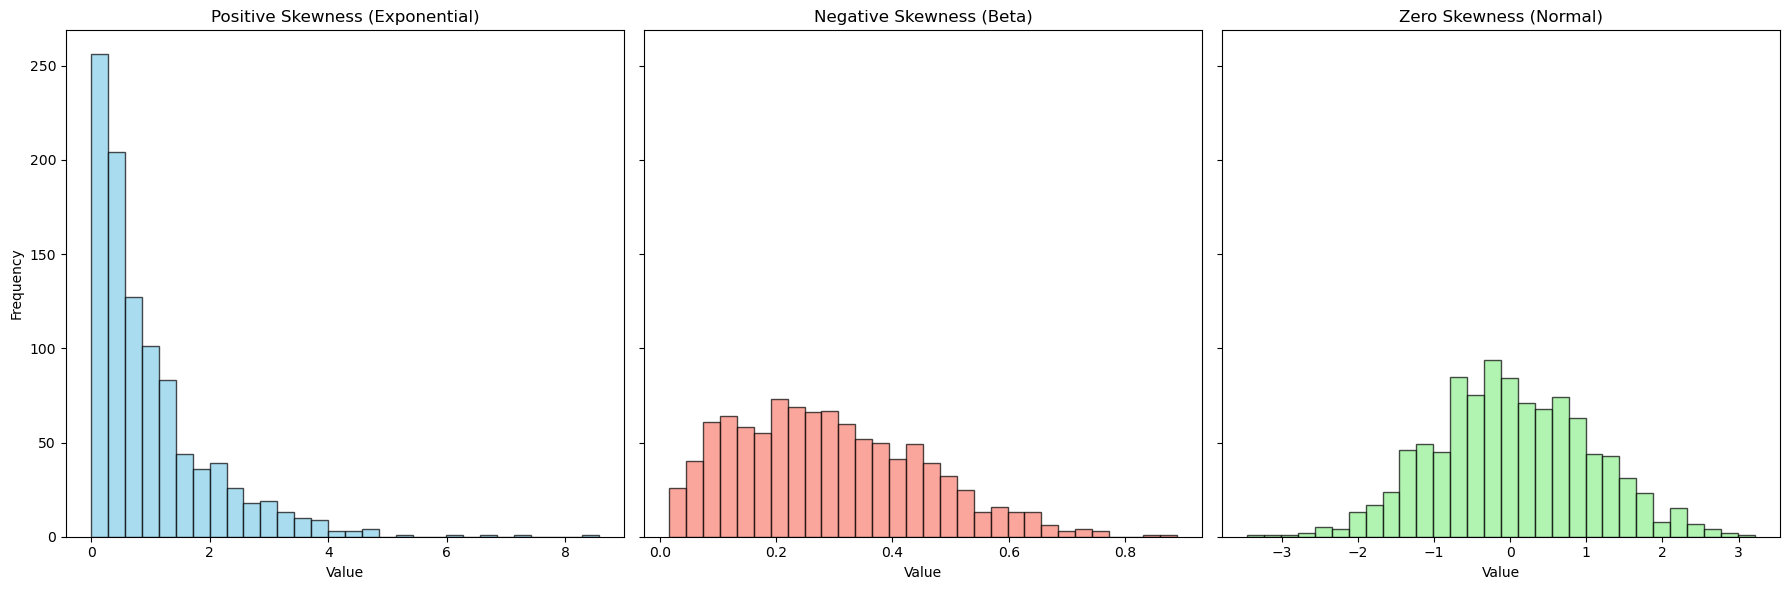

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, beta, norm

# Parameters
size = 1000  # Sample size

# Generate data
data_positive_skew = expon.rvs(scale=1, size=size)
data_negative_skew = beta.rvs(a=2, b=5, size=size)  # a < b for negative skewness
data_zero_skew = norm.rvs(loc=0, scale=1, size=size)

# Create plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Positive Skewness
axs[0].hist(data_positive_skew, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Positive Skewness (Exponential)')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Negative Skewness
axs[1].hist(data_negative_skew, bins=30, color='salmon', edgecolor='black', alpha=0.7)
axs[1].set_title('Negative Skewness (Beta)')
axs[1].set_xlabel('Value')

# Zero Skewness
axs[2].hist(data_zero_skew, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axs[2].set_title('Zero Skewness (Normal)')
axs[2].set_xlabel('Value')

plt.tight_layout()
plt.show()

### Kurtosis
To demonstrate distributions with different levels of kurtosis, we can use distributions that exhibit:

- Leptokurtosis (High Kurtosis): A distribution with heavy tails and a sharp peak, such as the t-distribution with a low degree of freedom.
- Mesokurtosis (Normal Kurtosis): A distribution with a standard peak and tails, such as the Normal Distribution.
- Platykurtosis (Low Kurtosis): A distribution with light tails and a flatter peak, such as the Uniform Distribution.

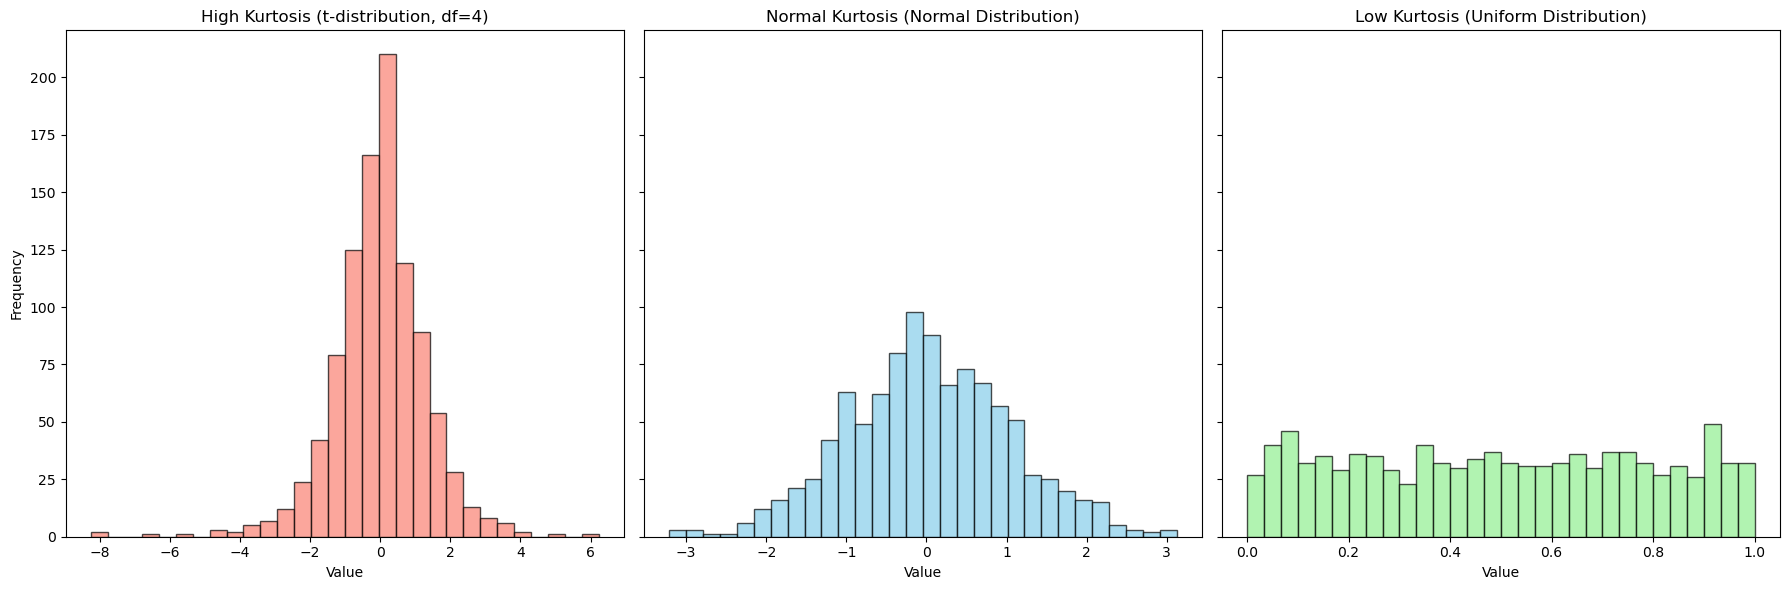

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, t

# Parameters
size = 1000  # Sample size
df = 4       # Degrees of freedom for t-distribution

# Generate data
data_high_kurtosis = t.rvs(df=df, size=size)
data_normal_kurtosis = norm.rvs(size=size)
data_low_kurtosis = uniform.rvs(size=size)

# Create plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# High Kurtosis (Leptokurtic)
axs[0].hist(data_high_kurtosis, bins=30, color='salmon', edgecolor='black', alpha=0.7)
axs[0].set_title(f'High Kurtosis (t-distribution, df={df})')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Normal Kurtosis (Mesokurtic)
axs[1].hist(data_normal_kurtosis, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axs[1].set_title('Normal Kurtosis (Normal Distribution)')
axs[1].set_xlabel('Value')

# Low Kurtosis (Platykurtic)
axs[2].hist(data_low_kurtosis, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axs[2].set_title('Low Kurtosis (Uniform Distribution)')
axs[2].set_xlabel('Value')

plt.tight_layout()
plt.show()